## Transforming non-stationary data into stationary data is crucial for time series analysis, especially for models that assume stationarity (e.g., ARIMA models). Here are common techniques to achieve stationarity:


1. Differencing
- Differencing is the most widely used method to remove trends and seasonality.
## First-order differencing:
Subtract each value from the previous one.


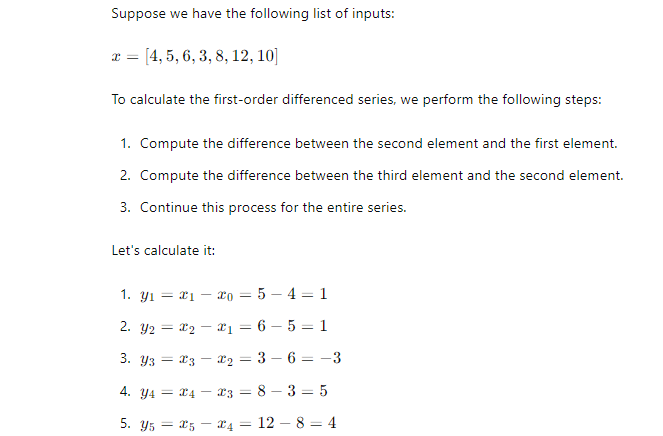

In [5]:
import numpy as np
import pandas as pd

# Sample data
data = np.array([1, 3, 5, 7, 9, 11])

# First-order differencing
diff_data = np.diff(data, n=1)

print("First-order differenced data:", diff_data)
diff_second=np.diff(diff_data)
print("Second-order",diff_second)

First-order differenced data: [2 2 2 2 2]
Second-order [0 0 0 0]


## Seasonal differencing:

- Seasonal differencing is used to remove seasonal components of a time series. This involves subtracting the value from the same season in the previous cycle. Mathematically, for a given time series
- Subtract the value from the same time period in the previous cycle.

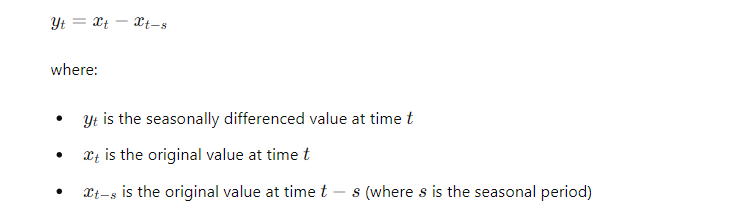

## Example
- Suppose we have the following list of monthly sales data with a seasonality period 
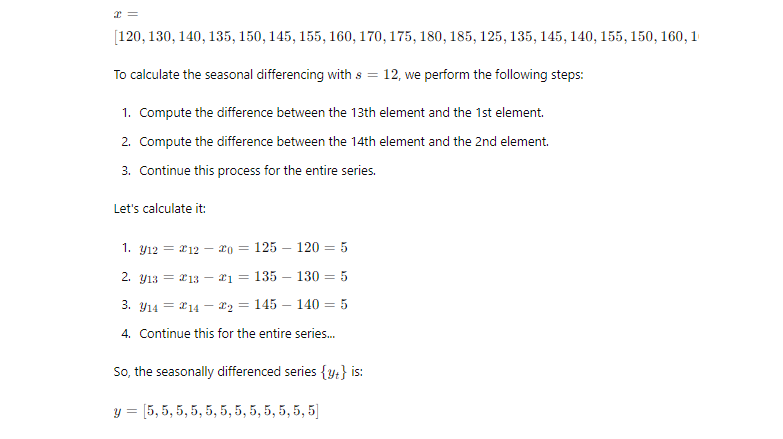

In [6]:
# Sample data with seasonality
data = np.array([10, 12, 15, 10, 12, 15, 10, 12, 15])

# Seasonal differencing (seasonal period = 3)
seasonal_diff_data = data[3:] - data[:-3]

print("Seasonally differenced data:", seasonal_diff_data)


Seasonally differenced data: [0 0 0 0 0 0]


## Transformation
- Applying mathematical transformations can stabilize the variance.

### Log transformation:
- Useful when the variance grows with the mean.
- Log transformation is often used in time series analysis to stabilize the variance and make the data more normally distributed. This transformation is particularly useful when dealing with data that has exponential growth patterns or heteroscedasticity (non-constant variance).

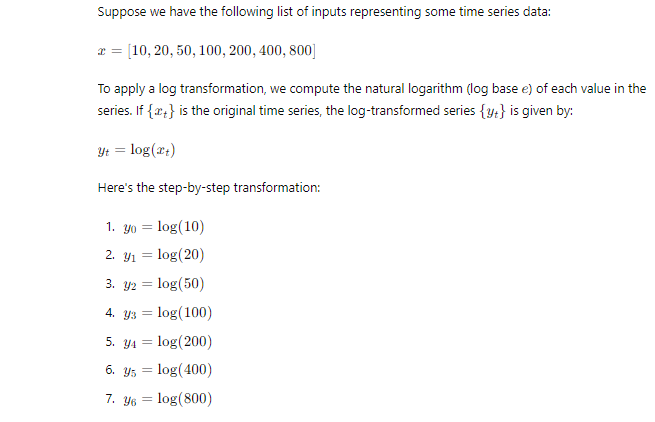


## Please note:
- Handling Zero or Negative Values: The log transformation can only be applied to positive values. If your data contains zero or negative values, you need to handle them appropriately (e.g., adding a constant to shift the data before transformation).
### Choice of Base: While natural logarithm (base - e) is commonly used, you can use other bases such as 10 or 2 depending on the context. For example, you can use math.log10(value) for log base 10.

(2+3+4+5)/4
(2-10.25)**2+(3-10.25)**2+/ 4 
S.D = sqr(Varince)

In [10]:
import math

def log_transformation(x):
    return [math.log(value) for value in x]

# Example input
x = [10, 20, 50, 100, 200, 400, 800]

# Apply log transformation
y = log_transformation(x)
y

[2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 5.298317366548036,
 5.991464547107982,
 6.684611727667927]

In [11]:
def log10_transformation(x):
    return [math.log10(value) for value in x]

# Apply log10 transformation
y_log10 = log10_transformation(x)
y


[2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 5.298317366548036,
 5.991464547107982,
 6.684611727667927]

In [12]:
# Sample data
data = np.array([10, 100, 1000, 10000, 100000])

# Log transformation
log_data = np.log(data)

print("Log transformed data:", log_data)


Log transformed data: [ 2.30258509  4.60517019  6.90775528  9.21034037 11.51292546]


### Square root transformation:
- Square root transformation is a technique used to reduce the skewness of a distribution, particularly for right-skewed data. It involves applying the square root function to each value in the data set.
- Useful for reducing skewness.
- This transformation can help stabilize the variance and make the data more normally distributed.
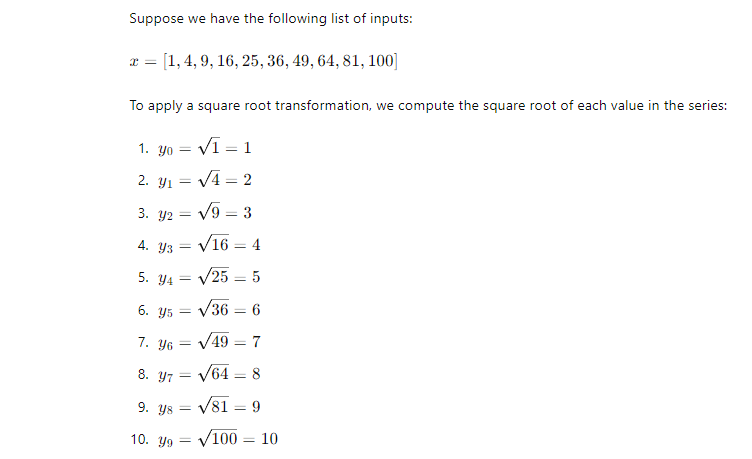

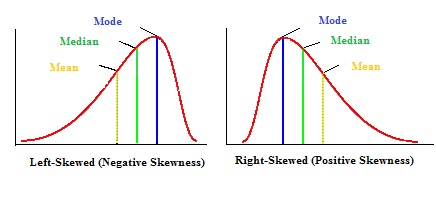

In [13]:
import math

def sqrt_transformation(x):
    return [math.sqrt(value) for value in x]

# Example input
x = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

# Apply square root transformation
y = sqrt_transformation(x)
print(y)  # Output: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [14]:
# Sample data
data = np.array([1, 4, 9, 16, 25])

# Square root transformation
sqrt_data = np.sqrt(data)

print("Square root transformed data:", sqrt_data)


Square root transformed data: [1. 2. 3. 4. 5.]


### Detrending

Detrending is the process of removing trends from a time series to isolate the underlying cyclical, seasonal, or irregular components. Trends in a time series represent long-term movements or changes in the mean level of the data over time. By detrending, we aim to study the more subtle fluctuations around the trend.

- Using linear regression:
Fit a linear model and subtract the fitted values.

### Example of Detrending using Differencing
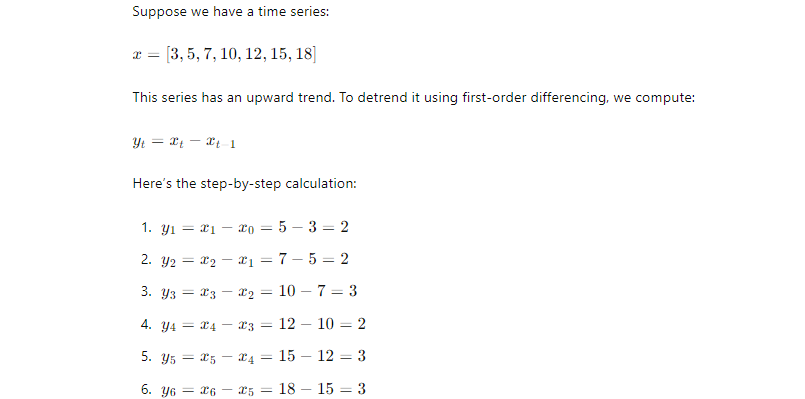

In [ ]:
def detrend(x):
    return [x[i] - x[i-1] for i in range(1, len(x))]

# Example input
x = [3, 5, 7, 10, 12, 15, 18]

# Detrend the series
y = detrend(x)
print(y)  # Output: [2, 2, 3, 2, 3, 3]


In [15]:
from sklearn.linear_model import LinearRegression

# Sample data
data = np.array([1, 3, 5, 7, 9, 11])
time = np.arange(len(data)).reshape(-1, 1)

# Fit linear regression
model = LinearRegression().fit(time, data)
trend = model.predict(time)

# Detrended data
detrended_data = data - trend

print("Detrended data:", detrended_data)


Detrended data: [-8.8817842e-16 -4.4408921e-16  0.0000000e+00  8.8817842e-16
  0.0000000e+00  0.0000000e+00]


## . Seasonal Adjustment
Remove seasonal effects by subtracting the seasonal mean.

In [28]:
[10, 12, 15, 10, 12, 15, 10, 12, 15]

(10+10+10)/3
10-10

0

In [26]:
seasonal_means

array([10., 12., 15.])

In [25]:
# Sample data with seasonality
data = np.array([10, 12, 15, 10, 12, 15, 10, 12, 15])

# Calculate seasonal means (seasonal period = 3)
seasonal_period = 3
seasonal_means = np.mean(data.reshape(-1, seasonal_period), axis=0)

# Seasonal adjustment
seasonally_adjusted_data = data - np.tile(seasonal_means, len(data) // seasonal_period)

print("Seasonally adjusted data:", seasonally_adjusted_data)


Seasonally adjusted data: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Combining Techniques
- Often, a combination of these techniques is required to achieve stationarity. For instance, you might first difference the data and then apply a log transformation.

## Example Workflow:
Here's a complete example workflow combining differencing and transformation:

In [19]:
import numpy as np
import pandas as pd

# Sample non-stationary data
data = np.array([1, 15, 10, 18, 25, 40, 55, 80, 100, 130])

# Step 1: Log transformation
log_data = np.log(data)

# Step 2: First-order differencing
diff_log_data = np.diff(log_data, n=1)

print("Log transformed data:", log_data)
print("First-order differenced log data:", diff_log_data)


Log transformed data: [0.         2.7080502  2.30258509 2.89037176 3.21887582 3.68887945
 4.00733319 4.38202663 4.60517019 4.86753445]
First-order differenced log data: [ 2.7080502  -0.40546511  0.58778666  0.32850407  0.47000363  0.31845373
  0.37469345  0.22314355  0.26236426]


### Verifying Stationarity
- After transforming the data, it's important to verify that it is stationary. This can be done using statistical tests like the Augmented Dickey-Fuller (ADF) test

In [20]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(diff_log_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -36.20484227919018
p-value: 0.0
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}
The series is stationary.


## Quick Practice
To perform a lab work to transform two given input series into stationary data with following methods
- diffrencing 
-Transforming
- detrending 
- Seasonal differencing